In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            5000 non-null   int64  
 1   Name                   5000 non-null   object 
 2   Department             5000 non-null   object 
 3   Job Role               5000 non-null   object 
 4   Performance Score      5000 non-null   int64  
 5   KPI Score              5000 non-null   float64
 6   Attendance (%)         5000 non-null   float64
 7   Peer Rating            5000 non-null   float64
 8   Task Completion (%)    5000 non-null   float64
 9   Work Hours Logged      5000 non-null   int64  
 10  Manager Feedback       5000 non-null   float64
 11  Training Hours         5000 non-null   int64  
 12  Promotion Eligibility  5000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 507.9+ KB


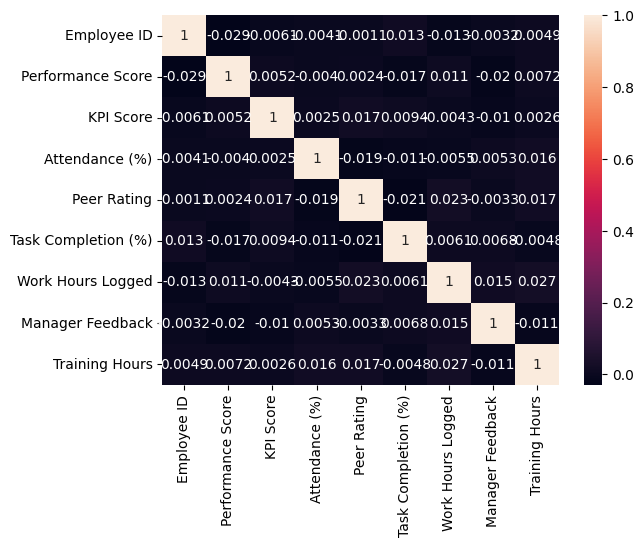

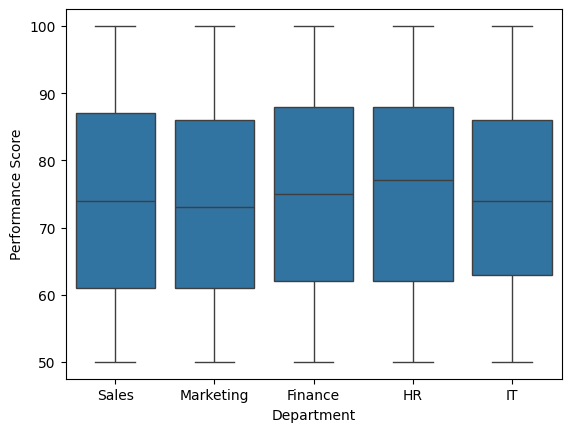

Accuracy: 0.83


In [21]:
df= pd.read_csv('Employee_Performance_Dataset.csv')
df.info()
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

df.groupby('Department')['Performance Score'].mean()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

sns.boxplot(x='Department', y='Performance Score', data=df)
plt.show()


df.groupby('Promotion Eligibility')['Training Hours'].mean()
# sns.boxplot(x='Promotion Eligibility', y='Training Hours', data=df)
# plt.show()

X = df[['Performance Score', 'Attendance (%)', 'Task Completion (%)', 'Training Hours']]
y = df['Promotion Eligibility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))
